<img src="https://devra.ai/analyst/notebook/3565/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">  <div style="font-size:150%; color:#FEE100"><b>Exploring AI Tools: Unveiling Trends in the AIToolBuzz Dataset</b></div>  <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div></div>

# Table of Contents

- [Introduction](#Introduction)
- [Imports and Configurations](#Imports-and-Configurations)
- [Data Loading](#Data-Loading)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Predictive Modeling](#Predictive-Modeling)
- [Summary and Future Work](#Summary-and-Future-Work)

# Introduction

The world of AI tools is evolving at an astonishing rate, and this dataset from AIToolBuzz offers a unique glimpse into the trends shaping the industry. In this notebook, we embark on an investigation that spans data cleaning, insightful visualizations, and even a predictive model to forecast website status. If you find this analysis useful, please consider upvoting it.

Let us dive in and unravel the secrets behind these 16,763 AI tools.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Use Agg backend for matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Set plot style
sns.set(style='whitegrid')

print('Libraries imported successfully.')

Libraries imported successfully.


# Data Loading

In this section, we load the dataset from the CSV file. The file is assumed to be located in the same directory as this notebook.

Columns in the dataset include details such as tool name, category, description, founding year and more.

In [2]:
# Load the dataset
file_path = '/kaggle/input/aitoolbuzz-com-16k-ai-tools-database/Complete AI Tools Dataset 2025 - 16763 Tools from AIToolBuzz.csv'
df = pd.read_csv(file_path, encoding='UTF-8-SIG', delimiter=',')

# Display basic information about the dataset
print('Data loaded successfully.')
print('Shape of dataset:', df.shape)
print('Columns:', df.columns.tolist())

Data loaded successfully.
Shape of dataset: (16762, 13)
Columns: ['Name', 'Link', 'Logo', 'Category', 'Primary Task', 'Keywords', 'Year Founded', 'Short Description', 'Country', 'industry', 'technologies', 'Website', 'Website Status']


# Data Cleaning and Preprocessing

Before delving into the analysis, we perform some basic data cleaning and preprocessing. This includes handling missing values, removing duplicates, and verifying that data types are correctly inferred.

It is not uncommon for others to run into issues where date or numeric columns are misinterpreted. Here we ensure that our methods correctly set the data types.

In [3]:
# Check for duplicates and missing values
print('Number of duplicate rows:', df.duplicated().sum())
print('Missing values per column:\n', df.isnull().sum())

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# For this dataset, 'Year Founded' is a numeric column; ensure there are no errors in its type
if not np.issubdtype(df['Year Founded'].dtype, np.number):
    df['Year Founded'] = pd.to_numeric(df['Year Founded'], errors='coerce')

# Any additional cleaning can be performed here
print('Data cleaning completed. Current shape:', df.shape)

Number of duplicate rows: 0
Missing values per column:
 Name                     0
Link                     0
Logo                   225
Category                 0
Primary Task             0
Keywords              7233
Year Founded         10931
Short Description      530
Country              10134
industry              8935
technologies          9129
Website                  0
Website Status          27
dtype: int64
Data cleaning completed. Current shape: (16762, 13)


# Exploratory Data Analysis

This section consists of various visualization techniques to help understand the distribution and trends in the dataset. We will begin with some bar plots and histograms and then move on to more detailed visualizations.

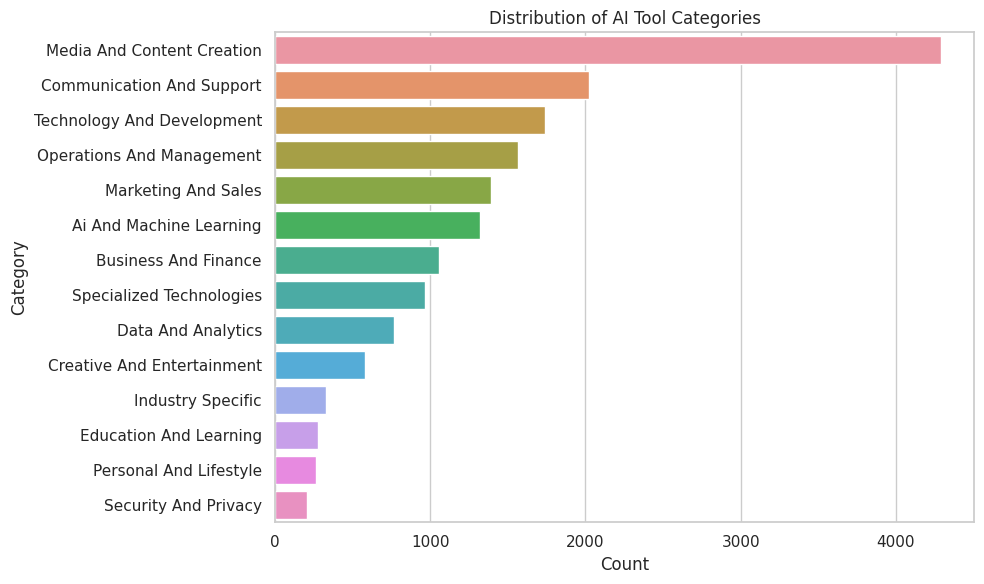

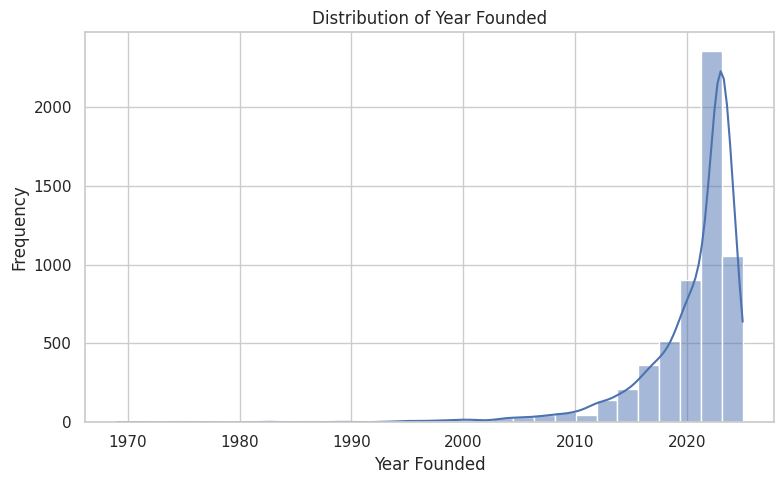

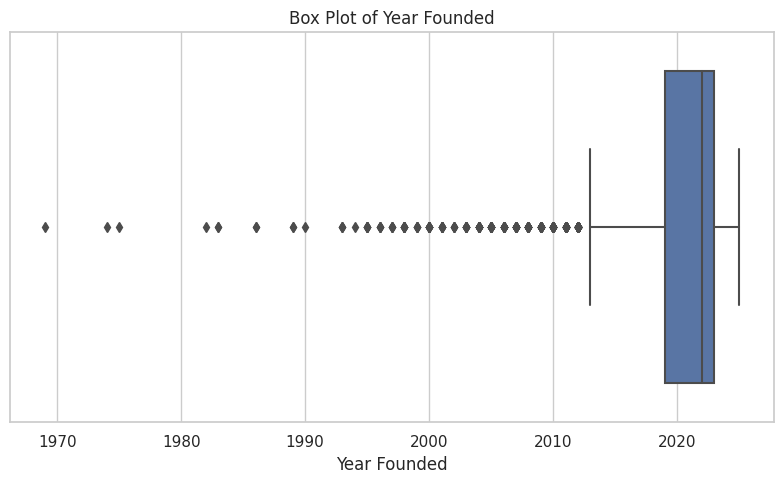

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index)
plt.title('Distribution of AI Tool Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# Histogram for Year Founded
plt.figure(figsize=(8, 5))
sns.histplot(df['Year Founded'].dropna(), kde=True, bins=30)
plt.title('Distribution of Year Founded')
plt.xlabel('Year Founded')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box Plot for Year Founded to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Year Founded'].dropna())
plt.title('Box Plot of Year Founded')
plt.xlabel('Year Founded')
plt.tight_layout()
plt.show()

# Predictive Modeling

In this section, we build a predictive model to classify the 'Website Status' of AI tools. The prediction is based on several features including 'Year Founded', 'Category', and 'Country'.

For readers encountering similar datasets, proper encoding of categorical variables and handling missing values are fundamental steps that prevent many errors during modeling. We will use Logistic Regression for this example and evaluate the model using its accuracy score.

Prediction Accuracy Score: 0.8797071129707112


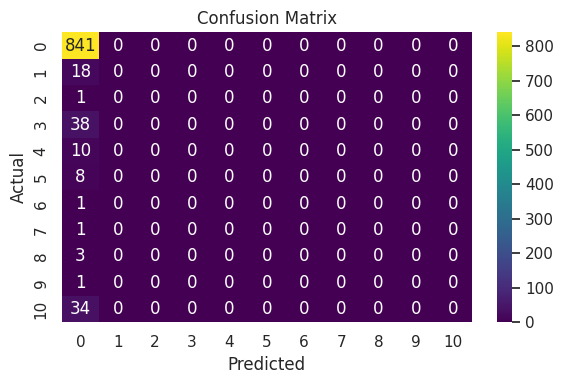

In [5]:
# Select features and target for prediction
predictor_features = ['Year Founded', 'Category', 'Country']
target = 'Website Status'

# Drop rows with missing values in selected columns
model_df = df[predictor_features + [target]].dropna()

# Initialize label encoders for categorical features
le_category = LabelEncoder()
le_country = LabelEncoder()
le_status = LabelEncoder()

# Encode categorical features
model_df['Category_enc'] = le_category.fit_transform(model_df['Category'])
model_df['Country_enc'] = le_country.fit_transform(model_df['Country'])

# Encode target variable
model_df['Website_Status_enc'] = le_status.fit_transform(model_df[target])

# Create feature matrix X and target vector y
X = model_df[['Year Founded', 'Category_enc', 'Country_enc']]
y = model_df['Website_Status_enc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Prediction Accuracy Score:', accuracy)

# Compute and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Summary and Future Work

This notebook presented a step-by-step analysis of the AIToolBuzz dataset. We began by carefully cleaning and preprocessing the data, explored various visualizations to understand the distributions and trends within the data, and finally built a predictive model to classify the website status of the tools.

The merits of our approach lie in its simplicity and illustrative power. The detailed visualizations facilitate an intuitive understanding of the dataset, and the predictive model, though elementary, showcases the potential of using even limited features to derive meaningful insights.

For future analysis, more sophisticated feature engineering and advanced modeling techniques (such as tree-based methods or ensemble models) could be explored. Additionally, incorporating natural language processing on the textual fields (e.g., 'Short Description' or 'Keywords') might further improve prediction performance, and exploring time-based trends if more date related features are mined would be a promising direction.

If you found this notebook insightful, please consider upvoting it.